In [1]:
#imports
import psycopg2 as pgsql
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#load variables from .env file
load_dotenv()

db_host = os.getenv("HOST")
db_database = os.getenv("DATABASE")
db_user = os.getenv("USER")
db_password = os.getenv("PASSWORD")

In [3]:
#Creating a connection to PostGresSQL 
connection = pgsql.connect(
    host=db_host,
    database=db_database,
    user=db_user,
    password=db_password
)

In [4]:
cur = connection.cursor()

In [5]:
cur.execute("SELECT * FROM DiabetesDS")
rows = cur.fetchall()

In [6]:
cur.execute("SELECT column_name FROM information_schema.\"columns\" WHERE table_name = 'diabetesds'")
columns = cur.fetchall()
columns

[('pregnancies',),
 ('glucose',),
 ('bloodpressure',),
 ('skinthickness',),
 ('insulin',),
 ('bmi',),
 ('diabetespedigreefunction',),
 ('age',),
 ('outcome',)]

In [7]:
# To close the connection with the database
cur.close()
connection.close()

In [8]:
column_names = [x[0] for x in columns] # Fetch only the names of the columns and not the tuple
data = pd.DataFrame(rows, columns=column_names)
data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# Check if there are any null values
print(data.isnull().values.any())

False


In [10]:
data.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'BMI')

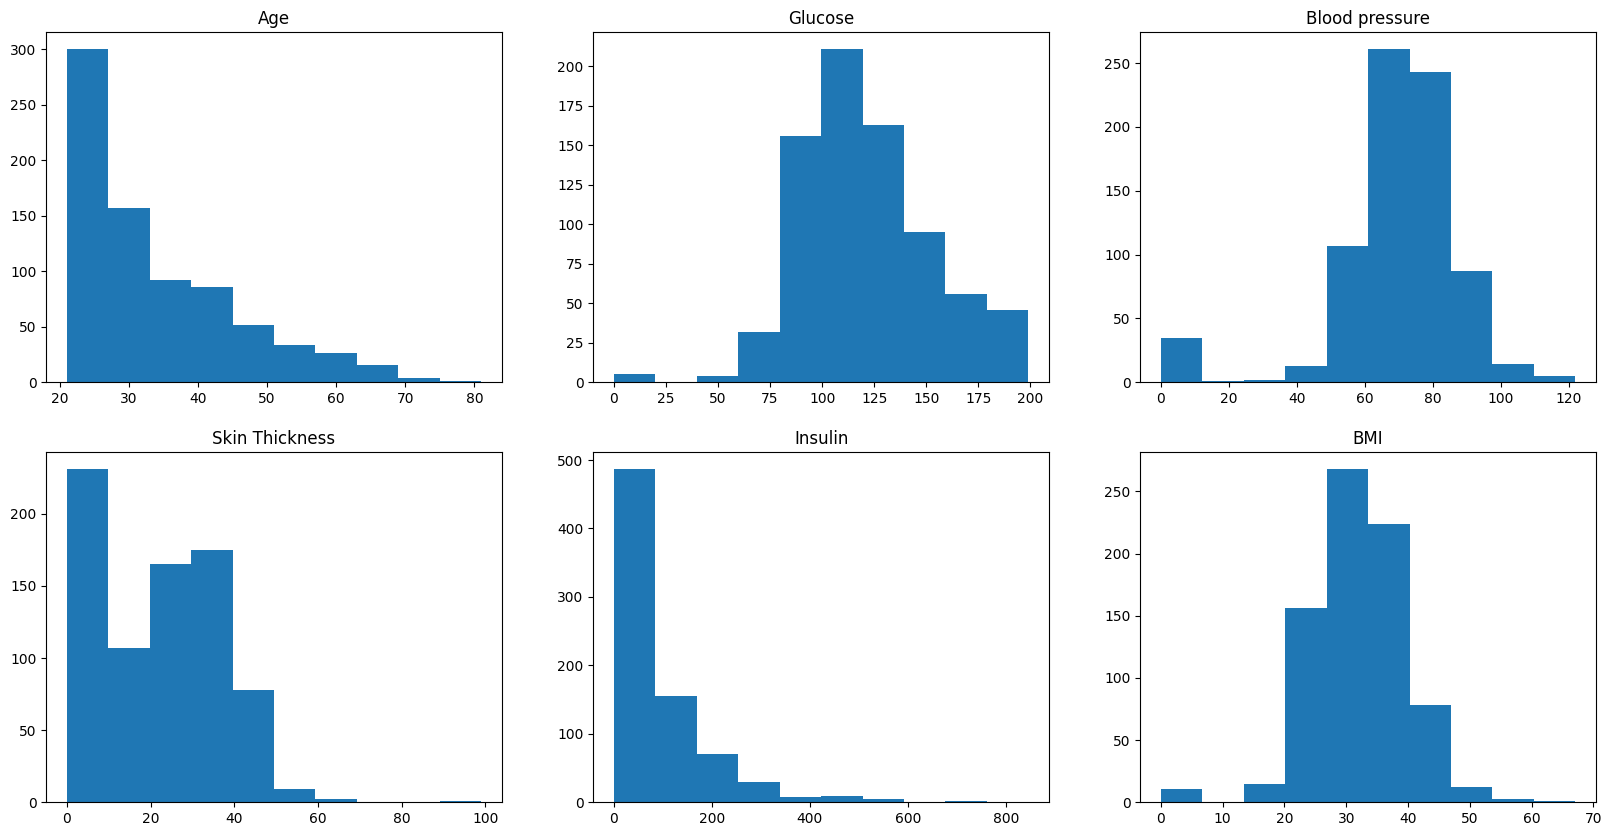

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0,0].hist(data['age'])
axs[0,0].set_title('Age')

axs[0,1].hist(data['glucose'])
axs[0,1].set_title('Glucose')

axs[0,2].hist(data['bloodpressure'])
axs[0,2].set_title('Blood pressure')

axs[1,0].hist(data['skinthickness'])
axs[1,0].set_title('Skin Thickness')

axs[1,1].hist(data['insulin'])
axs[1,1].set_title('Insulin')

axs[1,2].hist(data['bmi'])
axs[1,2].set_title('BMI')

Text(0.5, 1.0, 'diabetespedigreefunction')

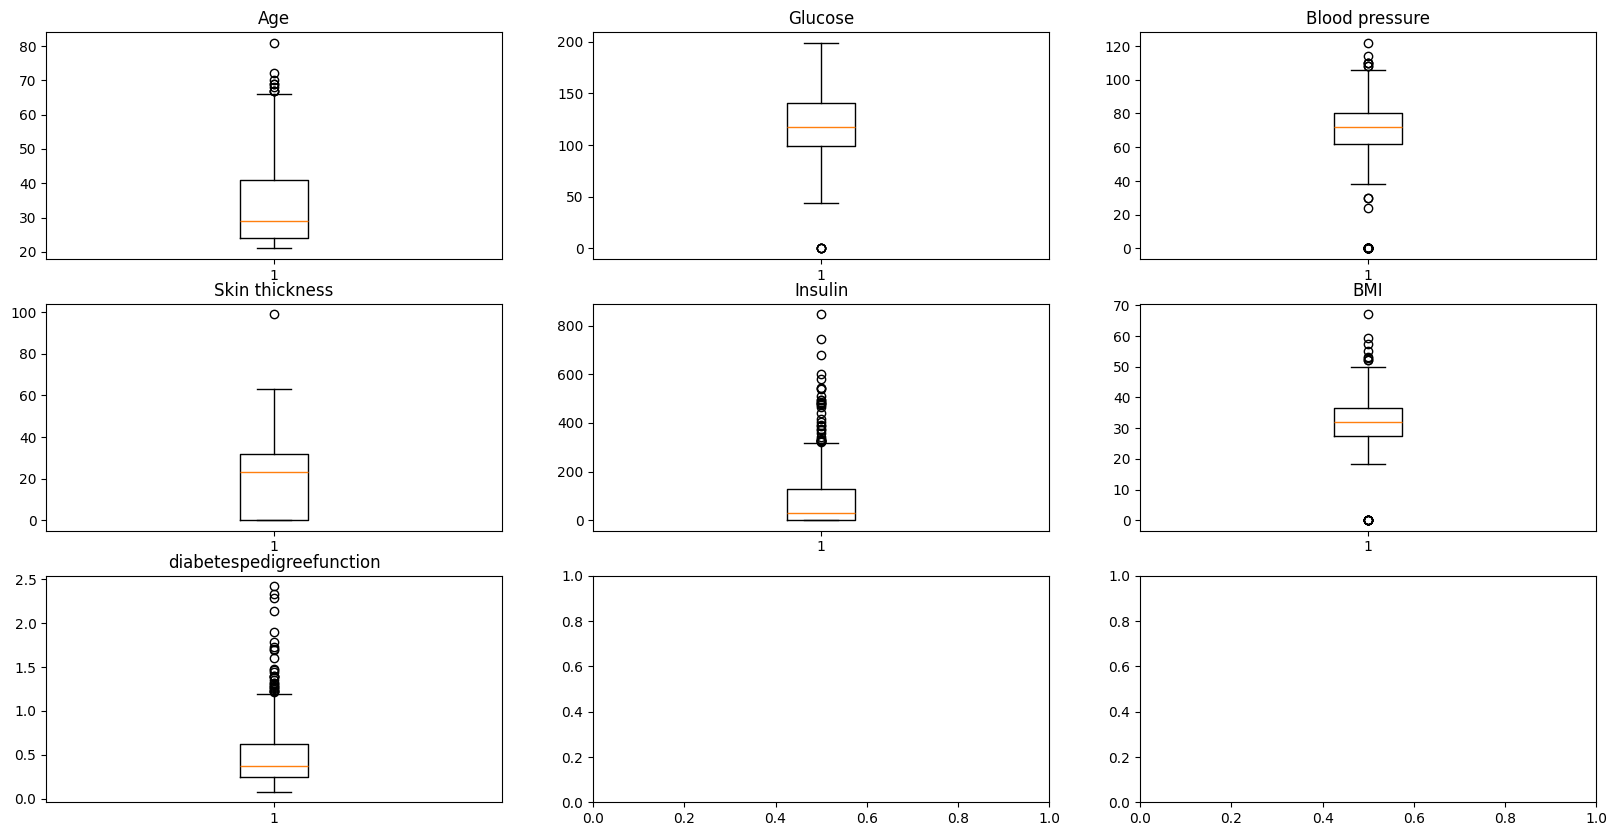

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

axs[0,0].boxplot(data['age'])
axs[0,0].set_title('Age')

axs[0,1].boxplot(data['glucose'])
axs[0,1].set_title('Glucose')

axs[0,2].boxplot(data['bloodpressure'])
axs[0,2].set_title('Blood pressure')

axs[1,0].boxplot(data['skinthickness'])
axs[1,0].set_title('Skin thickness')

axs[1,1].boxplot(data['insulin'])
axs[1,1].set_title('Insulin')

axs[1,2].boxplot(data['bmi'])
axs[1,2].set_title('BMI')

axs[2,0].boxplot(data['diabetespedigreefunction'])
axs[2,0].set_title('diabetespedigreefunction')

Text(0, 0.5, 'Skin Thickness')

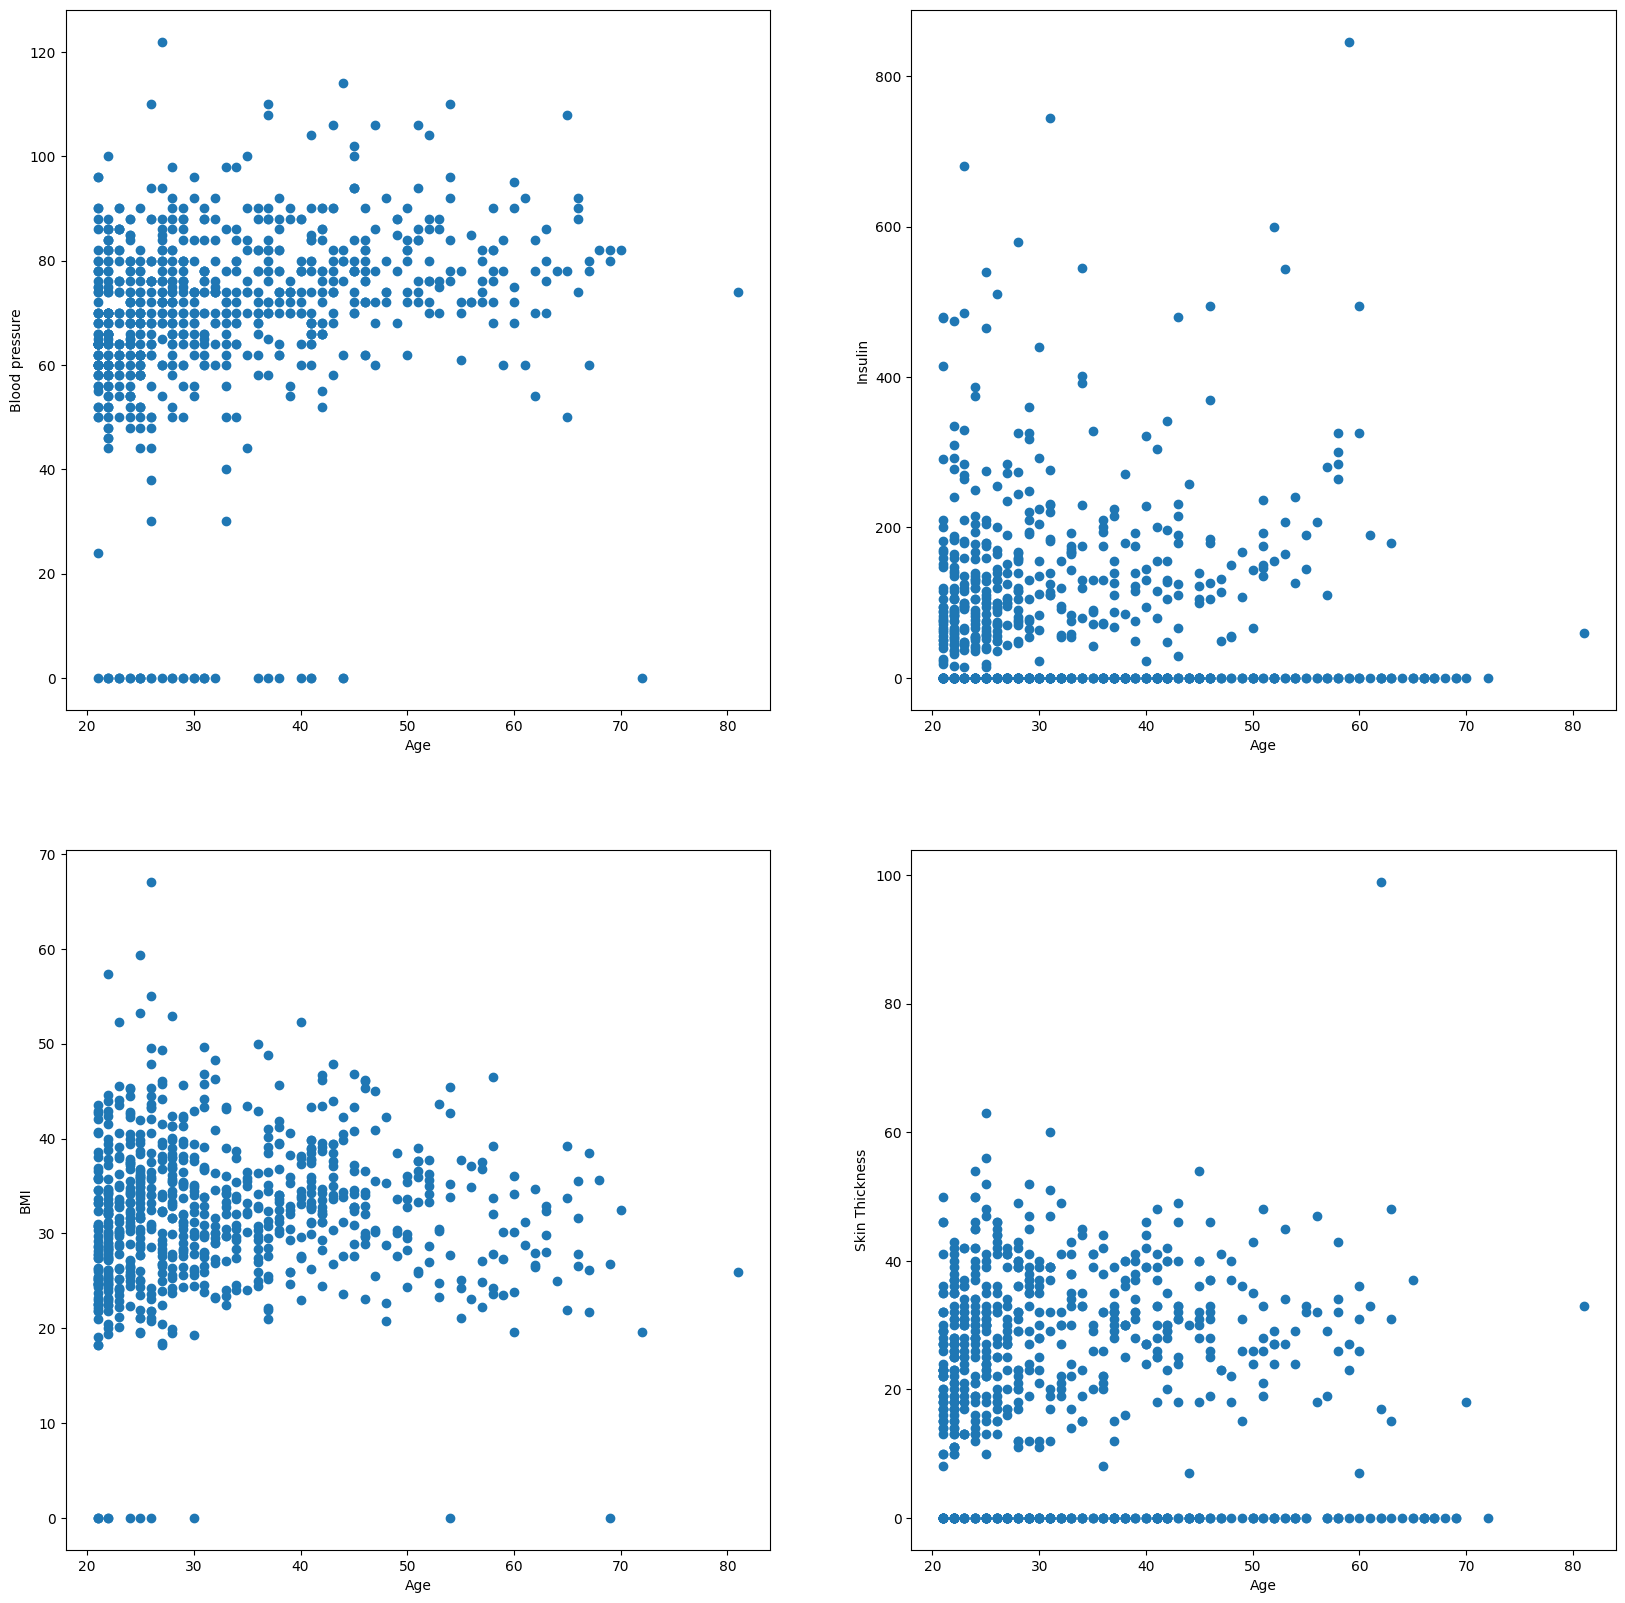

In [15]:
fig, axs = plt.subplots(2,2, figsize=(20, 20))

axs[0,0].scatter(data['age'], data['bloodpressure'])
axs[0,0].set_xlabel('Age')
axs[0,0].set_ylabel('Blood pressure')

axs[0,1].scatter(data['age'], data['insulin'])
axs[0,1].set_xlabel('Age')
axs[0,1].set_ylabel('Insulin')

axs[1,0].scatter(data['age'], data['bmi'])
axs[1,0].set_xlabel('Age')
axs[1,0].set_ylabel('BMI')

axs[1,1].scatter(data['age'], data['skinthickness'])
axs[1,1].set_xlabel('Age')
axs[1,1].set_ylabel('Skin Thickness')

In [16]:
#Checking data points

data[data['pregnancies'] == 17]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [17]:
data[data['skinthickness'] == 0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [18]:
#Outlier removal - for only Glucose, bloodpressure, skinthickness, insulin, bmi
#Not including the age and diabetespedigreefunction

def outlier_removal(df: pd.core.frame.DataFrame, *columns):
    df_filtered = df.copy()
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        df_filtered = df_filtered[((df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound))]
    return df_filtered



In [19]:
data_cleaned = outlier_removal(data, "glucose", "bloodpressure", "skinthickness", "insulin", "bmi")
data_cleaned

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0, 0.5, 'Skin Thickness')

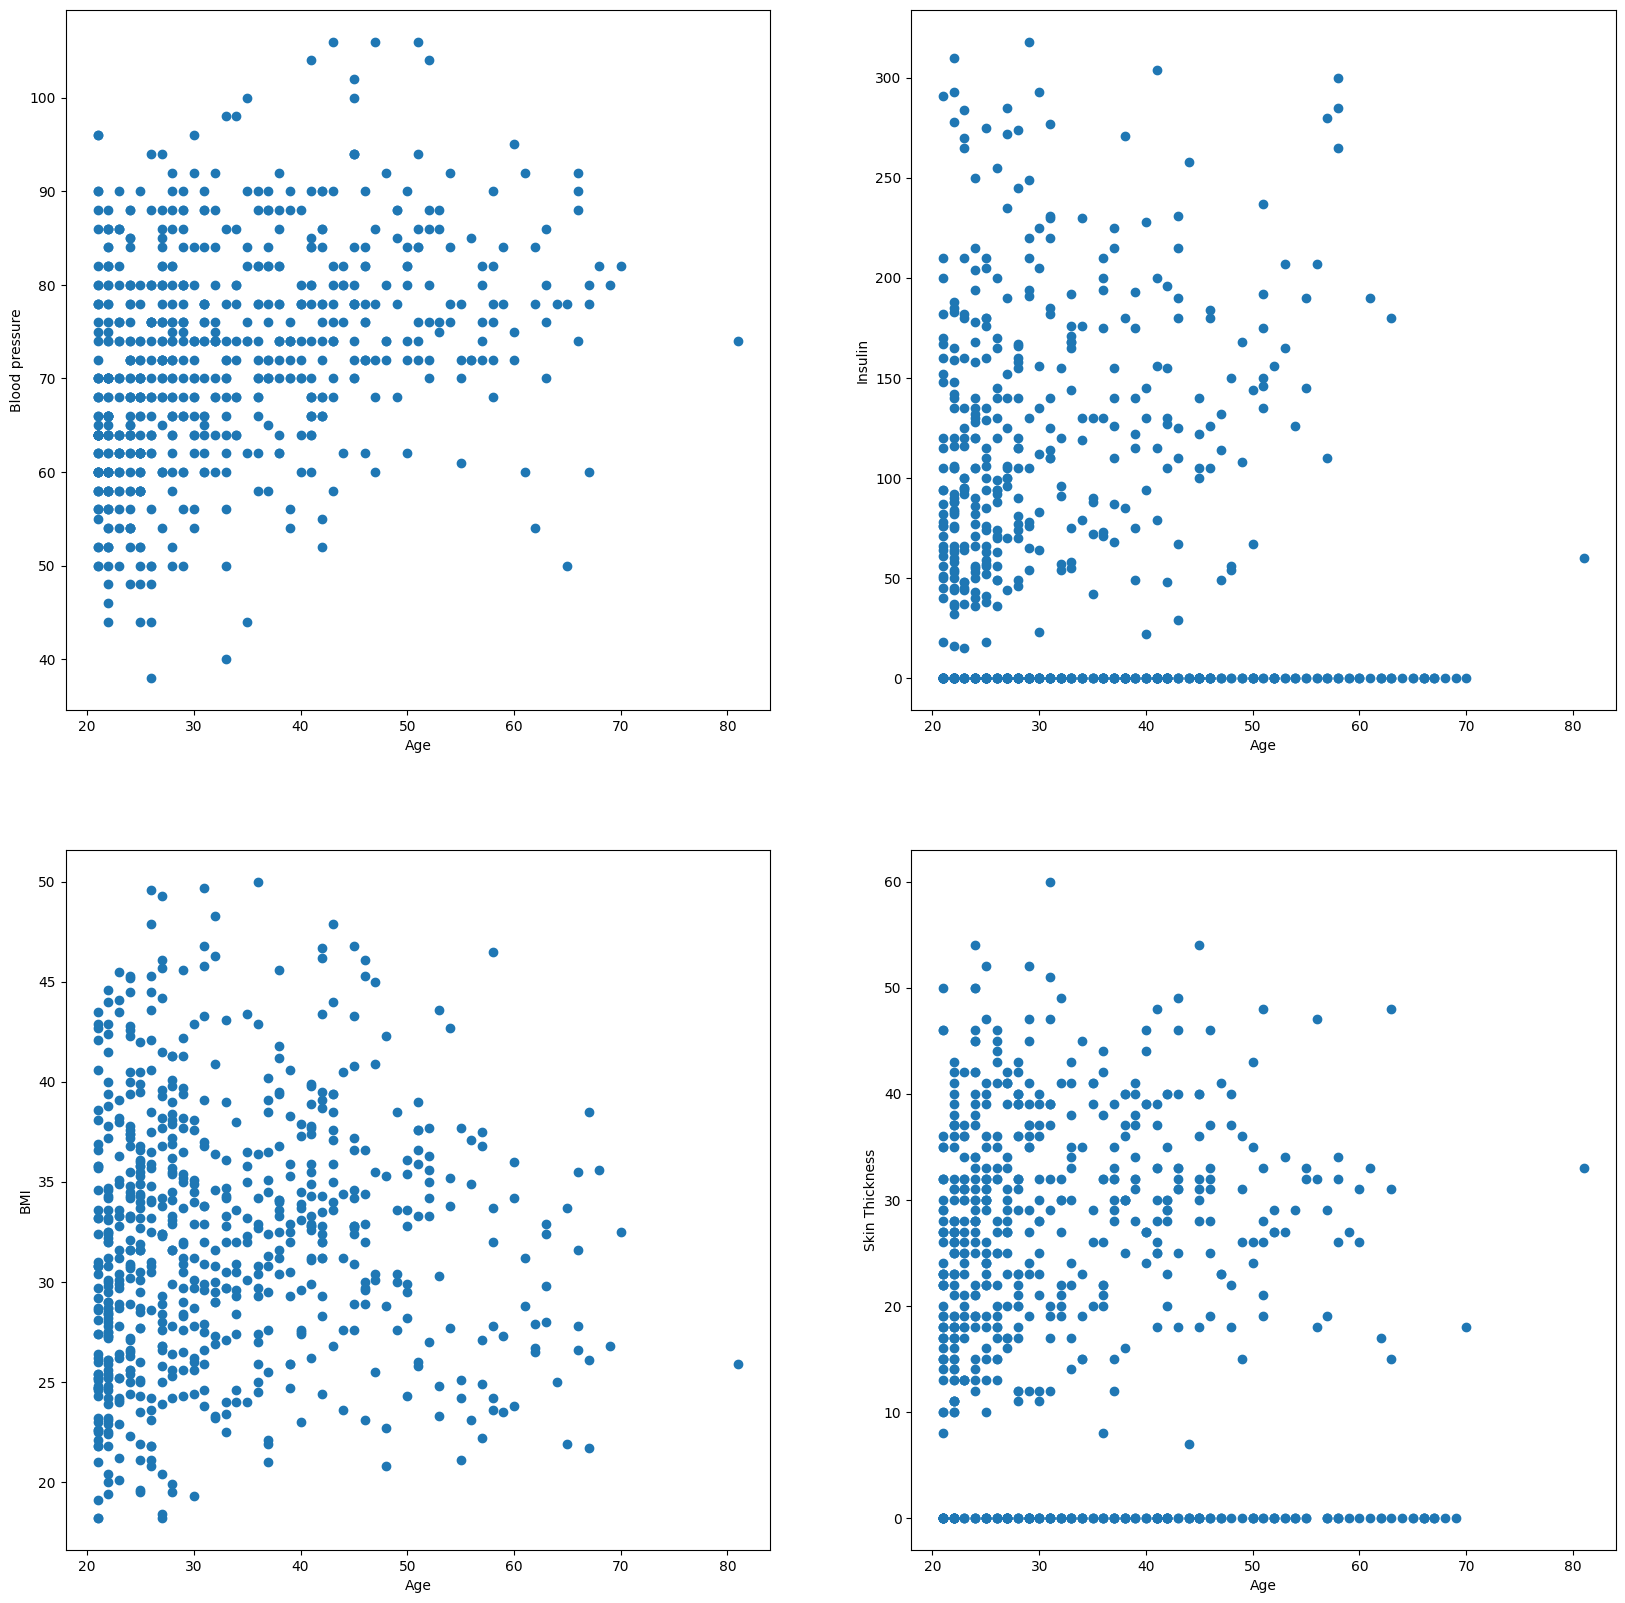

In [20]:
fig, axs = plt.subplots(2,2, figsize=(20, 20))

axs[0,0].scatter(data_cleaned['age'], data_cleaned['bloodpressure'])
axs[0,0].set_xlabel('Age')
axs[0,0].set_ylabel('Blood pressure')

axs[0,1].scatter(data_cleaned['age'], data_cleaned['insulin'])
axs[0,1].set_xlabel('Age')
axs[0,1].set_ylabel('Insulin')

axs[1,0].scatter(data_cleaned['age'], data_cleaned['bmi'])
axs[1,0].set_xlabel('Age')
axs[1,0].set_ylabel('BMI')

axs[1,1].scatter(data_cleaned['age'], data_cleaned['skinthickness'])
axs[1,1].set_xlabel('Age')
axs[1,1].set_ylabel('Skin Thickness')

In [21]:
data_cleaned.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,3.875556,119.757037,72.142222,20.640000,66.231111,32.058519,0.467037,33.248889,0.327407
std,3.371540,29.709577,11.375069,15.319714,79.989687,6.429586,0.315604,11.658735,0.469615
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,37.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,137.500000,80.000000,32.000000,120.000000,36.100000,0.613500,41.000000,1.000000
max,17.000000,199.000000,106.000000,60.000000,318.000000,50.000000,2.288000,81.000000,1.000000


In [22]:
data_cleaned[data_cleaned['skinthickness'] == 0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [23]:
# Checking the correlation
corr_matrix = data_cleaned.corr()
corr_matrix

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.154084,0.208595,-0.083827,-0.108063,0.033196,-0.017755,0.555717,0.230051
glucose,0.154084,1.000000,0.242111,0.000404,0.225375,0.211941,0.090288,0.275480,0.485521
bloodpressure,0.208595,0.242111,1.000000,0.024261,-0.060483,0.292972,-0.002160,0.345898,0.176525
skinthickness,-0.083827,0.000404,0.024261,1.000000,0.490101,0.387384,0.141046,-0.159388,0.058065
insulin,-0.108063,0.225375,-0.060483,0.490101,1.000000,0.189639,0.187712,-0.107366,0.108377
bmi,0.033196,0.211941,0.292972,0.387384,0.189639,1.000000,0.139078,0.045408,0.285130
diabetespedigreefunction,-0.017755,0.090288,-0.002160,0.141046,0.187712,0.139078,1.000000,0.041236,0.193581
age,0.555717,0.275480,0.345898,-0.159388,-0.107366,0.045408,0.041236,1.000000,0.241718
outcome,0.230051,0.485521,0.176525,0.058065,0.108377,0.285130,0.193581,0.241718,1.000000


In [24]:
corr_matrix['outcome']

pregnancies                 0.230051
glucose                     0.485521
bloodpressure               0.176525
skinthickness               0.058065
insulin                     0.108377
bmi                         0.285130
diabetespedigreefunction    0.193581
age                         0.241718
outcome                     1.000000
Name: outcome, dtype: float64

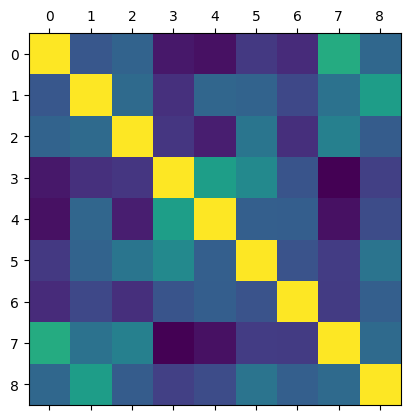

In [25]:
# Show the correlation matrix
plt.matshow(corr_matrix)
plt.show()

In [26]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.154084,0.208595,-0.083827,-0.108063,0.033196,-0.017755,0.555717,0.230051
glucose,0.154084,1.000000,0.242111,0.000404,0.225375,0.211941,0.090288,0.275480,0.485521
bloodpressure,0.208595,0.242111,1.000000,0.024261,-0.060483,0.292972,-0.002160,0.345898,0.176525
skinthickness,-0.083827,0.000404,0.024261,1.000000,0.490101,0.387384,0.141046,-0.159388,0.058065
insulin,-0.108063,0.225375,-0.060483,0.490101,1.000000,0.189639,0.187712,-0.107366,0.108377
bmi,0.033196,0.211941,0.292972,0.387384,0.189639,1.000000,0.139078,0.045408,0.285130
diabetespedigreefunction,-0.017755,0.090288,-0.002160,0.141046,0.187712,0.139078,1.000000,0.041236,0.193581
age,0.555717,0.275480,0.345898,-0.159388,-0.107366,0.045408,0.041236,1.000000,0.241718
outcome,0.230051,0.485521,0.176525,0.058065,0.108377,0.285130,0.193581,0.241718,1.000000


In [27]:
# We can drop skinthickness as the correlation with Output is less

data_cleaned.drop('skinthickness', axis=1, inplace=True)
data_cleaned

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [28]:
#Train test split

x = data_cleaned.drop('outcome', axis=1)
y = data_cleaned['outcome']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

In [30]:
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (540, 7)
Shape of X_test: (135, 7)
Shape of y_train: (540,)
Shape of y_test: (135,)


In [31]:
# Check for numerial columns

numerical_columns = x_train.select_dtypes(include=np.number).columns
numerical_columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'insulin', 'bmi',
       'diabetespedigreefunction', 'age'],
      dtype='object')

In [32]:
scaler = StandardScaler()
scaler.fit(x_train[numerical_columns])

StandardScaler()

In [33]:
x_train_scaled = scaler.transform(x_train[numerical_columns])
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=numerical_columns, index=x_train.index)

# If your original X_train_df had non-numerical columns, you'll need to combine them back
# X_train_processed_df = pd.concat([X_train_scaled_df, X_train_df.drop(columns=numerical_cols)], axis=1)

In [34]:
x_train_scaled_df

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age
500,-0.549359,-0.109458,1.581089,0.061958,-1.093593,-0.467435,-1.053033
398,-0.253887,-1.274954,-0.190807,-0.834105,-1.742487,-0.230297,-0.716461
419,-0.253887,0.290141,-0.722376,0.617264,-0.903673,-0.760737,-0.464033
669,1.518945,1.122638,0.517951,0.427955,-0.191473,-0.932350,0.966397
287,-0.844831,-0.042858,1.226710,1.942428,2.135047,1.077083,-0.379890
...,...,...,...,...,...,...,...
465,-1.140303,0.123641,-1.431134,0.491058,-1.631700,-0.033722,-1.053033
448,-1.140303,-0.542357,-0.722376,-0.026386,0.235847,0.147252,-0.968890
164,-1.140303,0.356741,1.403899,-0.834105,-0.080687,0.874267,-0.127461
277,-1.140303,-0.542357,-0.722376,0.629885,-0.682100,-0.027481,-0.884747


In [36]:
x_train_scaled

array([[-0.54935909, -0.10945799,  1.58108896, ..., -1.09359333,
        -0.46743467, -1.05303286],
       [-0.25388707, -1.27495434, -0.19080694, ..., -1.74248664,
        -0.23029663, -0.71646125],
       [-0.25388707,  0.29014076, -0.72237571, ..., -0.90367333,
        -0.76073699, -0.46403253],
       ...,
       [-1.14030314,  0.35674055,  1.40389937, ..., -0.08068669,
         0.87426741, -0.12746092],
       [-1.14030314, -0.54235664, -0.72237571, ..., -0.68210001,
        -0.0274812 , -0.88474705],
       [-0.25388707, -0.60895643,  0.16357224, ..., -0.41304668,
        -1.06652025, -0.12746092]])

In [35]:
x_test_scaled = scaler.transform(x_test[numerical_columns])
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=numerical_columns, index=x_test.index)
x_test_scaled_df

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age
739,-0.844831,-0.608956,0.163572,-0.834105,1.169620,-0.529839,0.713968
215,2.405361,1.022738,-0.190807,2.586078,1.533633,0.871147,0.377397
68,-0.844831,-0.842056,-0.545186,-0.354522,-1.979887,-0.401910,-0.716461
664,0.632529,-0.176058,-1.076755,-0.834105,0.251673,-0.679611,0.545682
173,-0.844831,-1.374854,-1.076755,-0.228316,1.802687,0.671452,-0.884747
...,...,...,...,...,...,...,...
33,0.632529,-0.941955,1.758279,-0.834105,-1.932407,-0.857464,-0.464033
755,-0.844831,0.256841,1.403899,0.554161,0.694820,1.854022,0.293254
156,-0.549359,-0.708856,-1.785513,0.352232,-1.188553,0.543522,-1.053033
488,0.041585,-0.708856,-0.013617,-0.834105,-1.030287,-0.526719,-0.464033
